# 

In [34]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('dataset.csv')

In [35]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Убераем пустые значения и также то, что не повлияет на популярность трека из логики.

In [36]:
df = df.drop(columns=["Unnamed: 0", "track_id", "track_name"])
df.info()
df = df.dropna()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   popularity        114000 non-null  int64  
 3   duration_ms       114000 non-null  int64  
 4   explicit          114000 non-null  bool   
 5   danceability      114000 non-null  float64
 6   energy            114000 non-null  float64
 7   key               114000 non-null  int64  
 8   loudness          114000 non-null  float64
 9   mode              114000 non-null  int64  
 10  speechiness       114000 non-null  float64
 11  acousticness      114000 non-null  float64
 12  instrumentalness  114000 non-null  float64
 13  liveness          114000 non-null  float64
 14  valence           114000 non-null  float64
 15  tempo             114000 non-null  float64
 16  time_signature    11

artists             0
album_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [37]:
print("Общая информация о наборе данных:")
df.info()

print("\nСтатистическое описание числовых признаков:")
print(df.describe())

Общая информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   popularity        113999 non-null  int64  
 3   duration_ms       113999 non-null  int64  
 4   explicit          113999 non-null  bool   
 5   danceability      113999 non-null  float64
 6   energy            113999 non-null  float64
 7   key               113999 non-null  int64  
 8   loudness          113999 non-null  float64
 9   mode              113999 non-null  int64  
 10  speechiness       113999 non-null  float64
 11  acousticness      113999 non-null  float64
 12  instrumentalness  113999 non-null  float64
 13  liveness          113999 non-null  float64
 14  valence           113999 non-null  float64
 15  tempo             113999 non-null  floa

In [38]:
missing_values = df.isnull().sum()
print("\nПропущенные значения по столбцам:")
print(missing_values[missing_values > 0])



Пропущенные значения по столбцам:
Series([], dtype: int64)


EDA

1. Гистограммы числовых признаков, чтобы посмотреть как распределены значения. 

<Figure size 1600x1200 with 0 Axes>

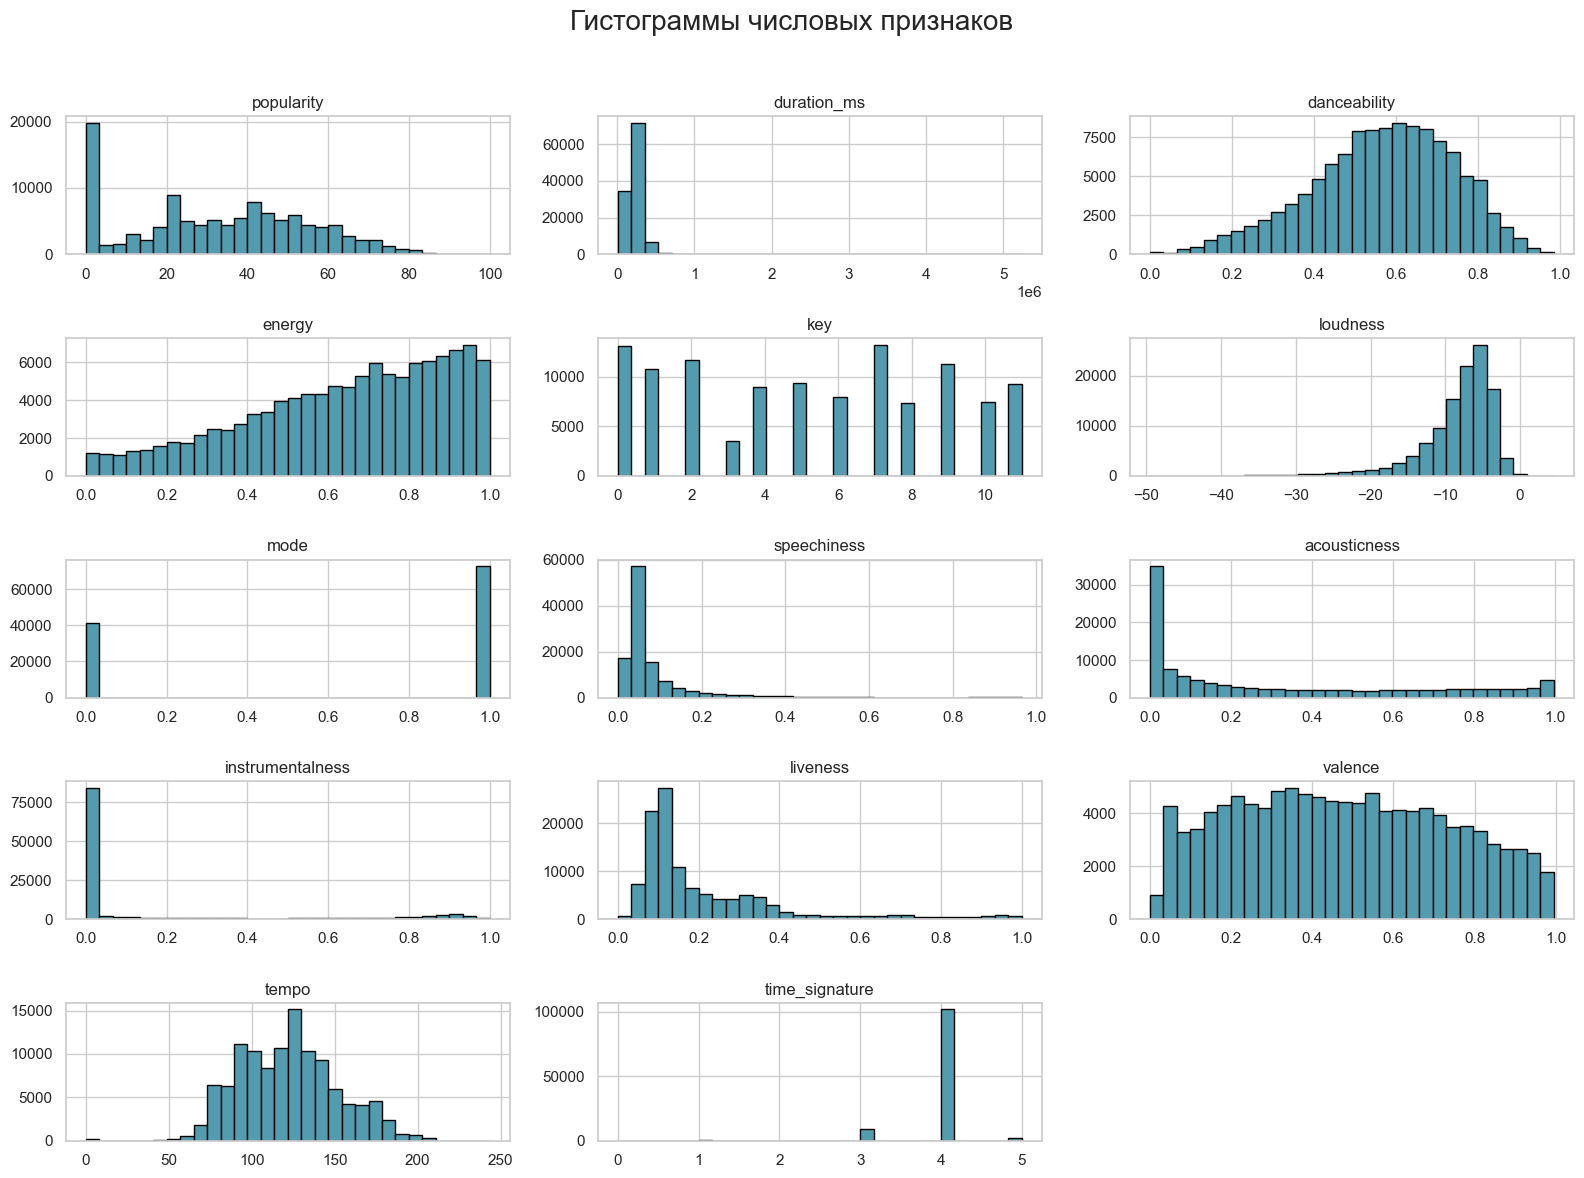

In [39]:
numeric_features = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(16, 12))

df[numeric_features].hist(bins=30, figsize=(16, 12), layout=(5, 3), color='#539caf', edgecolor='black')

plt.suptitle('Гистограммы числовых признаков', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

Вывод по графику:

    popularity: Большинство треков имеют низкую популярность, что логично, так как хиты составляют меньшую долю от общего числа треков.
    
    duration_ms: Распределение соответствует стандартной продолжительности музыкальных композиций (около 2-5 минут).
    
    danceability: Большинство треков имеют высокую танцевальность (0.6–0.8), что характерно для популярной музыки.
    
    energy: Распределение энергичности треков довольно равномерное, что указывает на разнообразие жанров в датасете.
    
    instrumentalness: Высокая концентрация близко к 0, что означает преобладание вокальных треков.
    
    valence: Равномерное распределение настроения треков, что говорит о разнообразии эмоционального окраса музыки.
    
    tempo: Пики в области 100-140 bpm, что соответствует типичному темпу современной музыки.
    
    time_signature: Преобладание размера такта 4/4, что является стандартом в музыке.


2. График распределения популярности песен - показывает общую популярность треков.

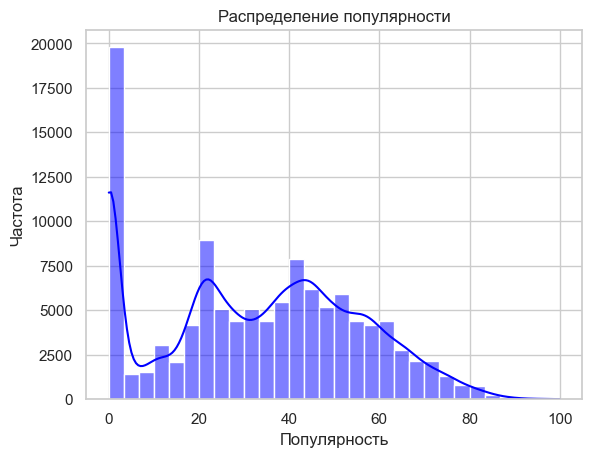

In [40]:
sns.histplot(df['popularity'], kde=True, bins=30, color='blue')
plt.title('Распределение популярности')
plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.show()

Вывод:
На графики распределения песен мы можем заметить, что большинство треков имеют популярность ниже среднего. 
Высокий же уровень встречается редко, что логично, т.к не каждый трек может сать хитом. 
Мы можем увидить в целом, что данные сбалансированы.

3. Распределение длительности треков - проверяет распределение треков по времени.

5. График Эмоциональный Индекс vs Popularity - чтобы посмотреть зависимость признака.

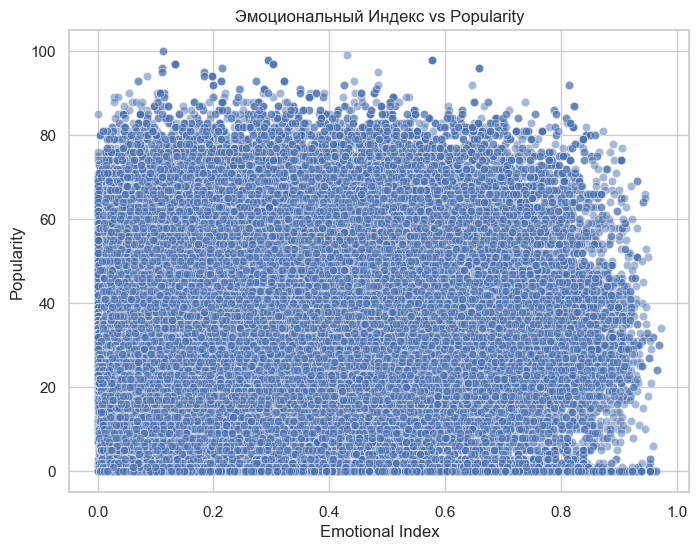

In [41]:
#Эмоциональный индекс (emotional_index)
df['emotional_index'] = df['valence'] * df['energy']

# Визуализация: Взаимосвязь emotional_index и popularity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='emotional_index', y='popularity', data=df, alpha=0.5)
plt.title('Эмоциональный Индекс vs Popularity')
plt.xlabel('Emotional Index')
plt.ylabel('Popularity')
plt.show()

Эмоциональный индекс слабо коррелирует с популярностью: треки с любой популярностью встречаются при разных значениях индекса. Популярность зависит от других факторов.

6. Связь между Loudness и Popularity

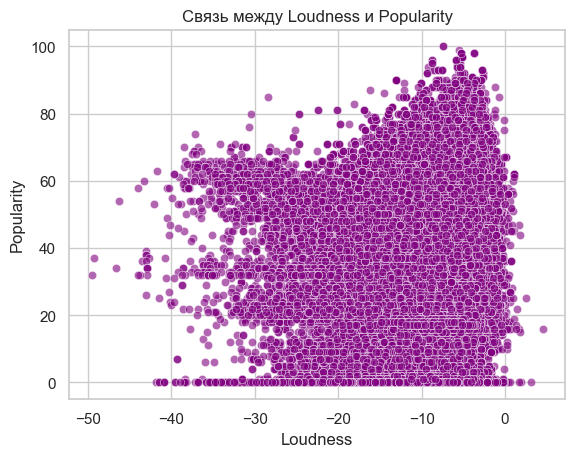

In [42]:
sns.scatterplot(x='loudness', y='popularity', data=df, alpha=0.6, color='purple')
plt.title('Связь между Loudness и Popularity')
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.show()

Вывод:
График демонстрирует, что точки распределены равномерно по всему диапазону громкости, без очевидной связи между громкостью и популярностью. Это говорит о том, что громкость не является ключевым фактором, определяющим популярность трека: более громкие треки не всегда более популярны, и наоборот. Большинство треков имеют громкость в пределах от -20 дБ до -5 дБ, однако их популярность в этом диапазоне варьируется.
Таким образом, громкость не оказывает значимого влияния на популярность трека, что может указывать на большую роль других характеристик, таких как ритм, темп или текст.

7. Связь между Danceability и Popularity

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="danceability", y="popularity", cmap="viridis", fill=True)
plt.title("Связь между Danceability и Popularity")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.show()

Вывод:
    Основное скопление данных:
        Основное "ядро" плотности находится в диапазоне значений Danceability около 0.5–0.8 и Popularity около 30–70.
        Это говорит о том, что треки со средней и высокой танцевальностью чаще всего обладают средней или выше средней популярностью.

    Редкие треки:
        При низкой танцевальности (0.0–0.3) популярность также чаще всего низкая.
        Высокая популярность при низкой танцевальности встречается реже.

    Взаимосвязь:
        Можно предположить положительную корреляцию между танцевальностью и популярностью: более танцевальные треки, как правило, имеют более высокую популярность.

8. Распределение настроения (valence) по музыкальным жанрам

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

top_genres = df['track_genre'].value_counts().head(30).index
filtered_df = df[df['track_genre'].isin(top_genres)]

# Создаем график
plt.figure(figsize=(12, 8))  # Более компактный размер
sns.boxplot(data=filtered_df, y='track_genre', x='valence', palette="viridis")

# Заголовок и подписи осей
plt.title("Распределение настроения (valence) по музыкальным жанрам", fontsize=16, pad=20)
plt.xlabel("Настроение (valence)", fontsize=12, labelpad=10)
plt.ylabel("Музыкальный жанр", fontsize=12, labelpad=10)

# Увеличиваем шрифты меток
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Добавляем сетку
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Подписываем медианы рядом с соответствующими боксами
medians = filtered_df.groupby('track_genre')['valence'].median()
for i, median in enumerate(medians):
    plt.text(median, i, f'{median:.2f}', 
             horizontalalignment='left', verticalalignment='center',
             fontsize=10, color='darkred')

# Автоматическая настройка интервалов
plt.tight_layout()
plt.show()

Вывод: Анализ распределения настроения треков в разных жанрах помогает понять, какие жанры более "веселые" или "грустные".

Жанры значительно различаются по настроению.
Например, жанры с более высоким valence (веселые) могут быть "детские песни" или "поп", а с низким valence (грустные) — "блюз" или "классическая".

Настроение может быть разным и это надо будет учитывать при работе с данными.


9. Средняя громкость по жанрам и Средняя инструментальность по жанрам

C:\Users\admin\AppData\Local\Temp\ipykernel_32644\1112814702.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_loudness.index, x=genre_loudness.values, palette="viridis")
C:\Users\admin\AppData\Local\Temp\ipykernel_32644\1112814702.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_instrumental.index, x=genre_instrumental.values, palette="mako")


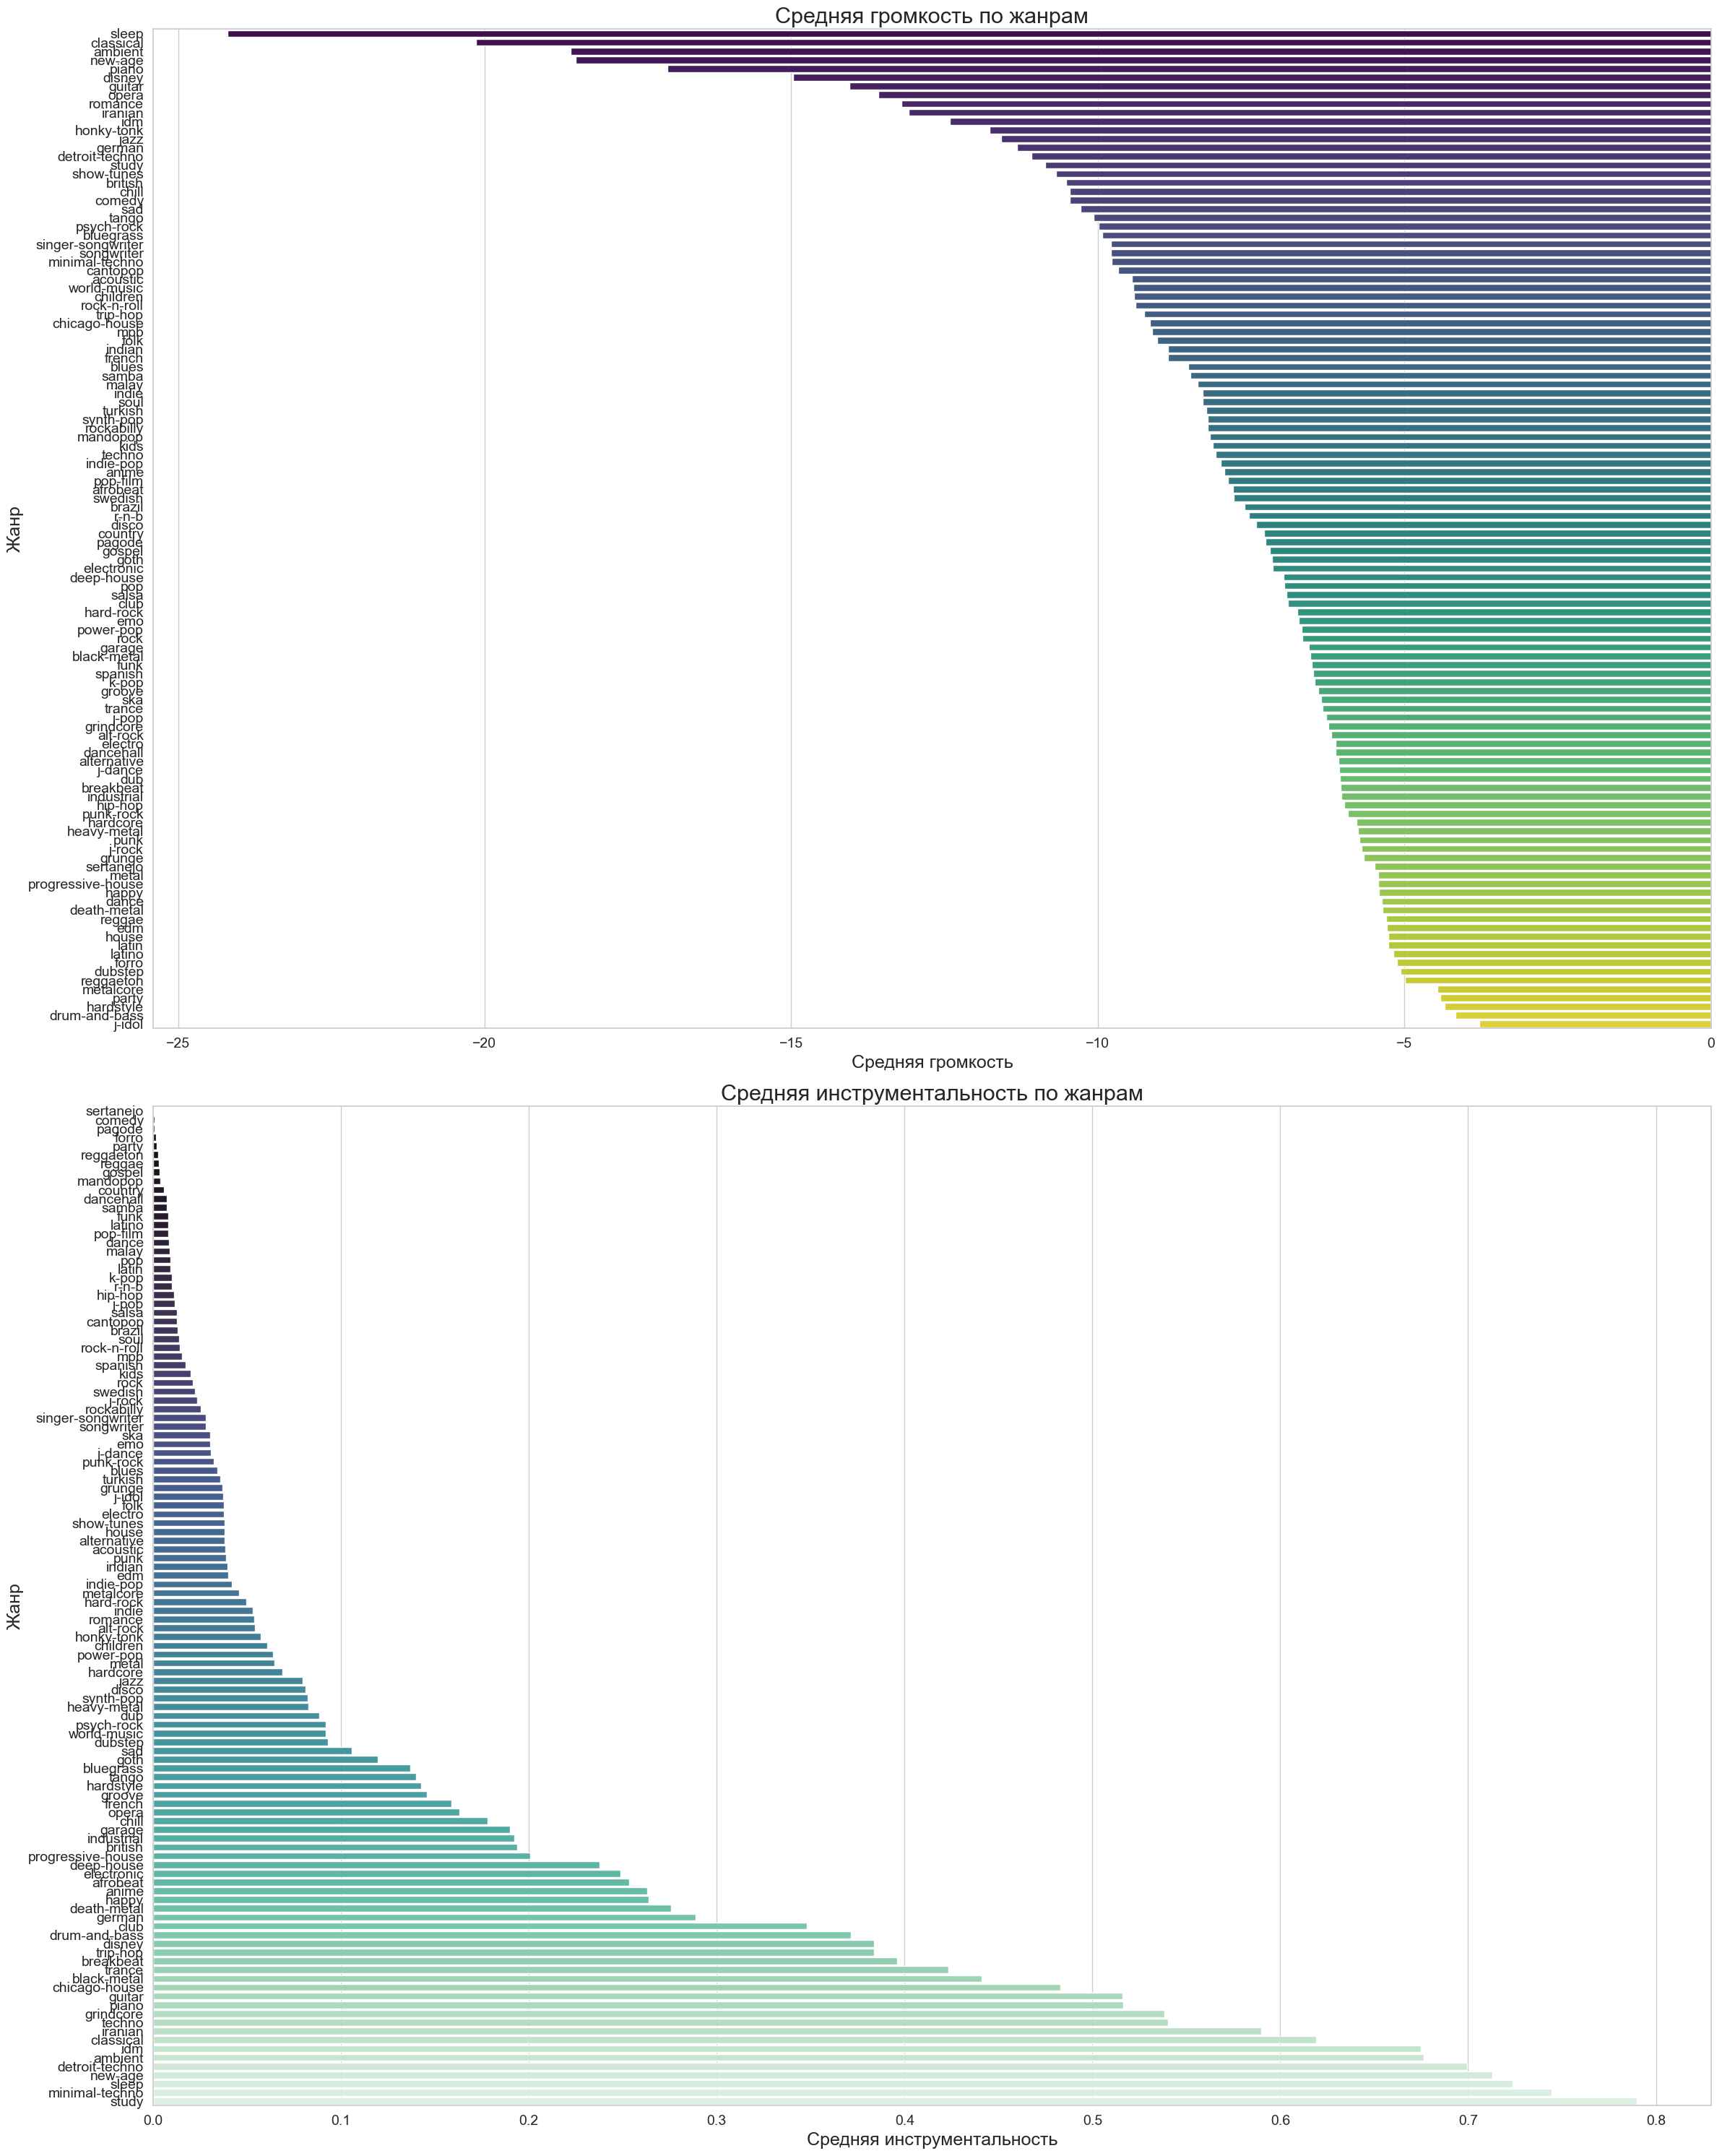

In [14]:
import seaborn as sns

sns.set_theme(style="whitegrid")

# Создаём фигуру с заданным размером
plt.figure(figsize=(24, 30))

# График 1: Средняя громкость по жанрам (горизонтально)
plt.subplot(2, 1, 1)
genre_loudness = df.groupby('track_genre')['loudness'].mean().sort_values()
sns.barplot(y=genre_loudness.index, x=genre_loudness.values, palette="viridis")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Средняя громкость', fontsize=18)
plt.ylabel('Жанр', fontsize=18)
plt.title('Средняя громкость по жанрам', fontsize=22)

# График 2: Средняя инструментальность по жанрам (горизонтально)
plt.subplot(2, 1, 2)
genre_instrumental = df.groupby('track_genre')['instrumentalness'].mean().sort_values()
sns.barplot(y=genre_instrumental.index, x=genre_instrumental.values, palette="mako")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Средняя инструментальность', fontsize=18)
plt.ylabel('Жанр', fontsize=18)
plt.title('Средняя инструментальность по жанрам', fontsize=22)

# Автоматическая настройка интервалов
plt.tight_layout()

# Отображение графиков
plt.show()

Вывод:
Громкость: Жанры, такие как "метал" и "рок", имеют более высокие значения громкости, что соответствует их характеристикам.
Инструментальность: Жанры "классическая" и "медитация" имеют высокую инструментальность, что логично, так как в них преобладают инструментальные композиции.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   popularity        113999 non-null  int64  
 3   duration_ms       113999 non-null  int64  
 4   explicit          113999 non-null  bool   
 5   danceability      113999 non-null  float64
 6   energy            113999 non-null  float64
 7   key               113999 non-null  int64  
 8   loudness          113999 non-null  float64
 9   mode              113999 non-null  int64  
 10  speechiness       113999 non-null  float64
 11  acousticness      113999 non-null  float64
 12  instrumentalness  113999 non-null  float64
 13  liveness          113999 non-null  float64
 14  valence           113999 non-null  float64
 15  tempo             113999 non-null  float64
 16  time_signature    113999 

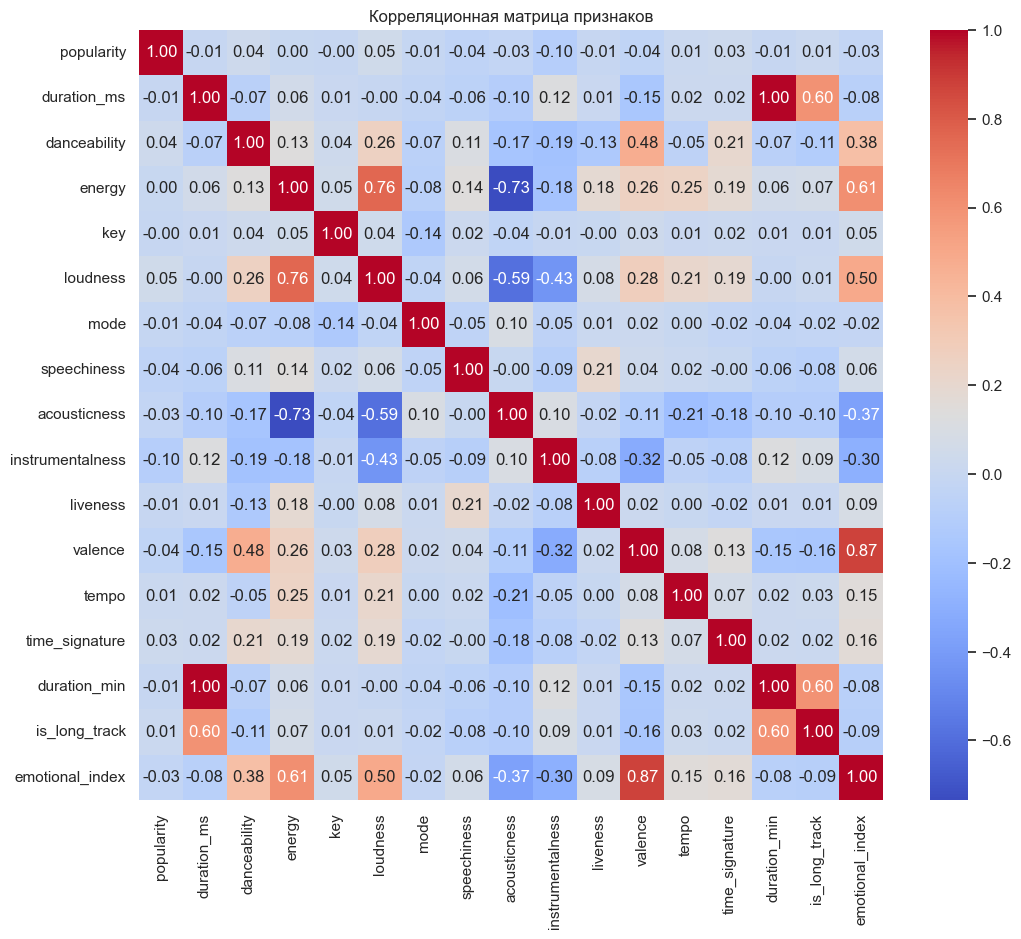

In [16]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
correlation = numerical_df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

Вывод:
    Сильные корреляции наблюдаются между энергией и громкостью, танцевальностью и валенсом, а также между длиной трека и его "долговечностью".
    Слабые или почти отсутствующие корреляции существуют между такими характеристиками, как ключ, тональность, акустичность и другие.
    Важно, что многие корреляции довольно слабы, что может означать, что влияние одного признака на другой не всегда очевидно или сильно выражено.

Эти данные можно использовать для дальнейшего анализа, оптимизации рекомендационных систем, улучшения качества треков в определённых жанрах или для более точного таргетинга на музыкальные предпочтения пользователей.

FE

In [17]:
numerical_features = df.select_dtypes(include=['number', 'float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

from sklearn.preprocessing import LabelEncoder

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

1. vocal_track_score - оценки вокальности трека

In [18]:
df['vocal_track_score'] = 1 - df['instrumentalness']

Здесь используется обратное значение метрики instrumentalness, которая указывает на вероятность того, что трек является инструментальным.

    instrumentalness: Значение ближе к 1 означает, что трек полностью инструментальный.
    vocal_track_score: Значение ближе к 1 указывает на то, что трек, скорее всего, содержит вокал.

2. loudness_normalized - нормализация громкости

In [19]:
df['loudness_normalized'] = (df['loudness'] - df['loudness'].min()) / (df['loudness'].max() - df['loudness'].min())

в диапазоне от 0 до 1. Формула выполняет мин-макс нормализацию, преобразуя исходные значения громкости, которые могут находиться в широком диапазоне (например, от -60 дБ до 0 дБ), в единый масштаб.
Значение 0 соответствует минимальной громкости.
Значение 1 соответствует максимальной громкости.
Промежуточные значения указывают относительное положение громкости трека между этими крайними значениями.

3. genre_vocal_factor - фактор вокала

In [20]:
df['genre_vocal_factor'] = df['vocal_track_score'] * (df['track_genre'] / df['track_genre'].max())

данный признак показывает влияние жанра и вокала на трек, где жанры с более высоким значением и треки с более выраженным вокалом дают больший вклад в genre_vocal_factor.

4. genre_loudness - громкость жанра

In [21]:
df['genre_loudness'] = df['track_genre'] * df['loudness_normalized']

5. emotional_impact - эмоциональный импакт

In [22]:
df['emotional_impact'] = (
    df['vocal_track_score'] * 0.4 +
    df['loudness_normalized'] * 0.3 +
    df['danceability'] * 0.3
)

использует комбинацию трех признаков, каждый из которых умножается на коэффициенты, отражающие их предполагаемую важность для целевой переменной 

6.  rhythm_factor - фактор ритма

In [23]:
df['rhythm_factor'] = df['tempo'] * df['danceability']

7.energy_dynamics

In [24]:
df['energy_dynamics'] = df['energy'] * df['loudness_normalized']


8. musical_complexity

In [25]:
df['musical_complexity'] = (
    df['tempo'] / df['tempo'].max() * 0.3 +
    df['time_signature'] / df['time_signature'].max() * 0.3 +
    df['key'] / df['key'].max() * 0.4
)


создается как линейная комбинация нормализованных значений трех признаков: темпа (tempo), размера такта (time_signature) и тональности (key). Все признаки нормализуются с помощью деления на их максимальные значения, а затем каждый из них умножается на соответствующий коэффициент важности

9. duration_min - длительность в минутах

In [26]:
df['duration_min'] = df['duration_ms'] / 60000

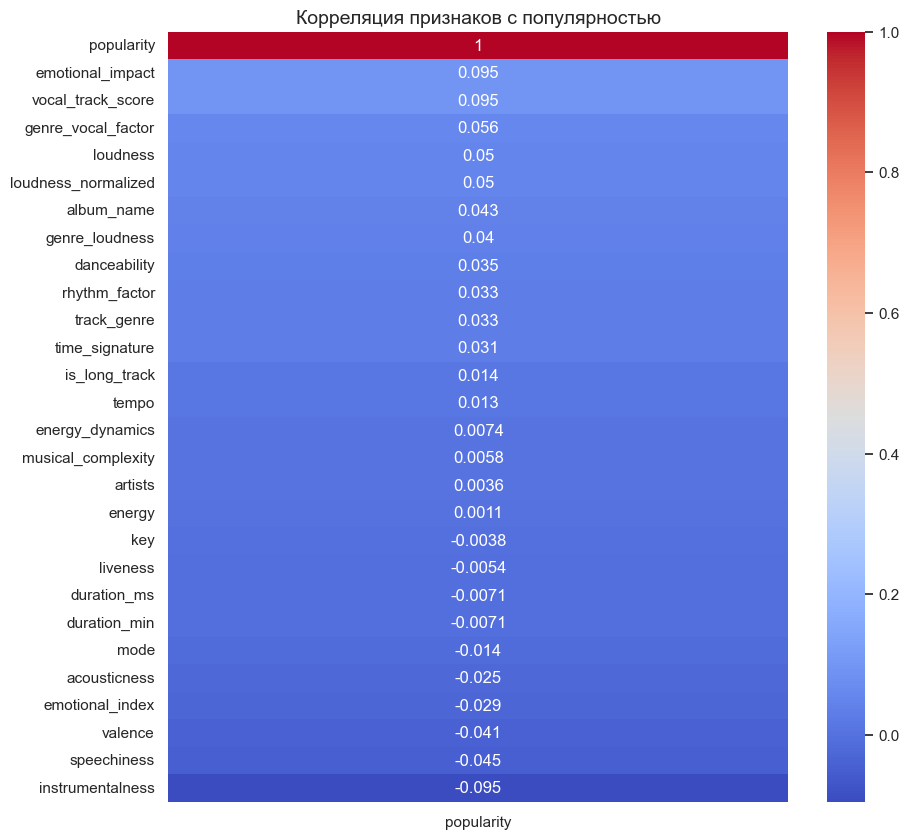

popularity             1.000000
emotional_impact       0.095152
vocal_track_score      0.095147
genre_vocal_factor     0.056272
loudness               0.050420
loudness_normalized    0.050420
album_name             0.042501
genre_loudness         0.040452
danceability           0.035444
rhythm_factor          0.032792
track_genre            0.032696
time_signature         0.031076
is_long_track          0.014102
tempo                  0.013212
energy_dynamics        0.007433
musical_complexity     0.005761
artists                0.003636
energy                 0.001053
key                   -0.003847
liveness              -0.005397
duration_ms           -0.007129
duration_min          -0.007129
mode                  -0.013948
acousticness          -0.025458
emotional_index       -0.029292
valence               -0.040522
speechiness           -0.044930
instrumentalness      -0.095147
Name: popularity, dtype: float64


In [27]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix[['popularity']].sort_values(by='popularity', ascending=False),
            annot=True, cmap='coolwarm', cbar=True)
plt.title('Корреляция признаков с популярностью', fontsize=14)
plt.show()

top_correlations = correlation_matrix['popularity'].sort_values(ascending=False)
print(top_correlations)

Вывод:
Корреляционная матрица показывает, что популярность трека в основном слабо зависит от большинства признаков, включая музыку, её длительность и акустические характеристики. Однако есть несколько признаков, таких как эмоциональное воздействие, вокальные особенности и жанровая специфика, которые, хотя и слабо, могут оказывать влияние на популярность трека. Более значимые признаки могли бы быть рассмотрены для более глубокого анализа.

МОДЕЛИРОВАНИЕ  посмотрим сначала на значение без наших фич

In [28]:
#Посмотрим на результаты сначала без наших фич
features = [
    'loudness', 'explicit', 'danceability', 'instrumentalness',
    'speechiness', 'valence', 'duration_ms', 'energy', 'tempo'
]


X = df[features]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 485.61
R^2 Score: 0.02


C:\Users\admin\AppData\Local\Temp\ipykernel_32644\1369313317.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, y='Feature', x='Importance', palette='Blues_d', orient='h')


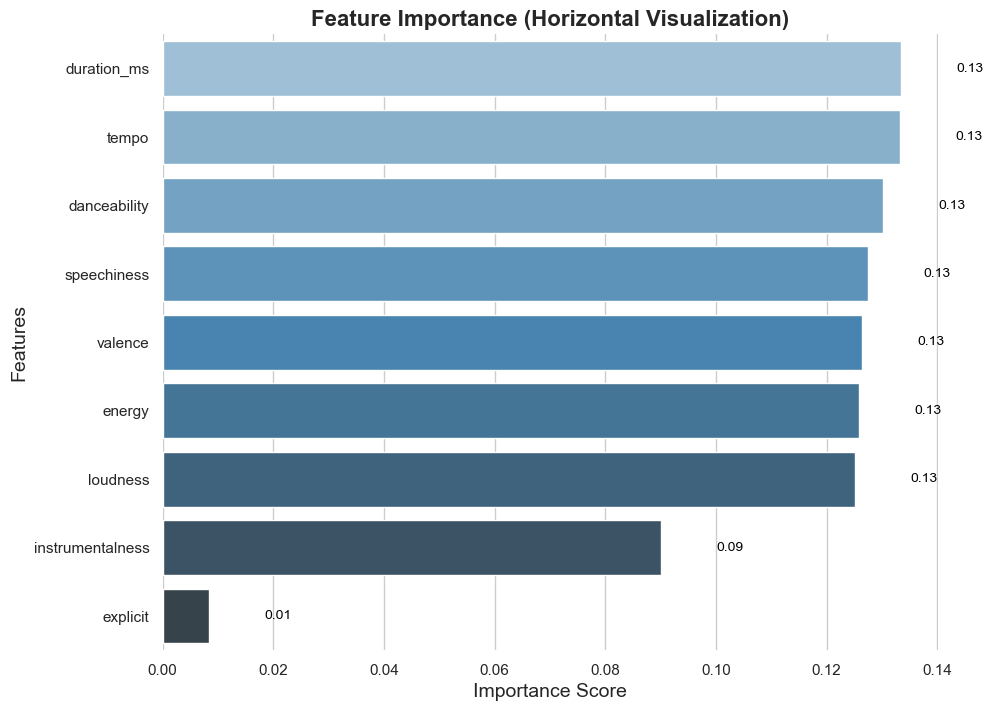

            Feature  Importance
6       duration_ms    0.133382
8             tempo    0.133169
2      danceability    0.130247
4       speechiness    0.127558
5           valence    0.126358
7            energy    0.125760
0          loudness    0.125044
3  instrumentalness    0.090113
1          explicit    0.008369


In [29]:
#Используем рандом форест, чтобы проверить важность наших фич
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 8))

sns.barplot(data=importance_df, y='Feature', x='Importance', palette='Blues_d', orient='h')

for i, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.01, i, f'{value:.2f}', va='center', fontsize=10, color='black')

plt.title('Feature Importance (Horizontal Visualization)', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)


sns.despine(left=True, bottom=True)


plt.show()

print(importance_df)

Вывод:
Ключевыми признаками для модели являются duration_ms, tempo, danceability, speechiness, которые наиболее сильно влияют на предсказания.
Признаки типа explicit оказывают минимальное влияние на модель и могут быть менее полезными для улучшения точности предсказания.

Посмотрим теперь с новыми фичами.

In [30]:
from sklearn.preprocessing import StandardScaler
selected_features = [
    'loudness', 'explicit', 'danceability', 'instrumentalness',
    'speechiness', 'valence', 'duration_ms', 'energy', 'tempo',
    'vocal_track_score', 
    'loudness_normalized', 
    'genre_vocal_factor', 
    'genre_loudness', 
    'emotional_impact', 
    'rhythm_factor', 
    'energy_dynamics', 
    'musical_complexity', 
    'duration_min'
]

X = df[selected_features]
y = df['popularity']
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred = linear_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 484.12
R^2 Score: 0.02


Теперь узнаем важность наших фич и отробосим потом бесполезные.

C:\Users\admin\AppData\Local\Temp\ipykernel_32644\468432851.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, y='Feature', x='Importance', palette='Blues_d', orient='h')


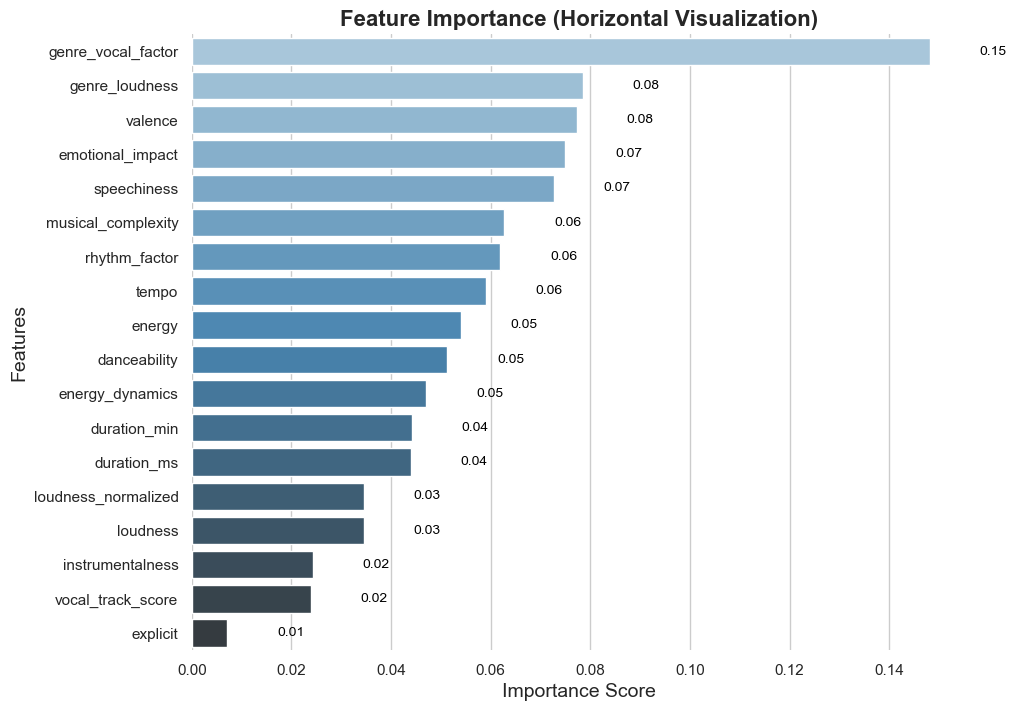

                Feature  Importance
11   genre_vocal_factor    0.148115
12       genre_loudness    0.078420
5               valence    0.077277
13     emotional_impact    0.074997
4           speechiness    0.072611
16   musical_complexity    0.062719
14        rhythm_factor    0.061956
8                 tempo    0.058997
7                energy    0.054025
2          danceability    0.051306
15      energy_dynamics    0.047025
17         duration_min    0.044206
6           duration_ms    0.043940
10  loudness_normalized    0.034547
0              loudness    0.034527
3      instrumentalness    0.024272
9     vocal_track_score    0.023928
1              explicit    0.007130


In [31]:
#Используем рандом форест, чтобы проверить важность наших фич
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 8))

sns.barplot(data=importance_df, y='Feature', x='Importance', palette='Blues_d', orient='h')

for i, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.01, i, f'{value:.2f}', va='center', fontsize=10, color='black')

plt.title('Feature Importance (Horizontal Visualization)', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)


sns.despine(left=True, bottom=True)


plt.show()

print(importance_df)

Добавление новых признаков значительно улучшило модель, выявив, что составные фичи, такие как genre_vocal_factor, emotional_impact, и musical_complexity, оказывают большее влияние на предсказания, чем базовые признаки. Эти фичи обеспечивают более глубокое понимание музыки и делают модель более интерпретируемой.
На основе Feature Importance мы можем
удалить такие  признаки:
    explicit (важность: 0.007130)
    vocal_track_score (важность: 0.023928)
    instrumentalness (важность: 0.024272)
    loudness (важность: 0.034527)
    loudness_normalized (важность: 0.034547)

Сделаем новый массив с важными фичами и посмотрим какая модель лучше всего справляется с поставленной задачей.

In [32]:
important_features = [
    'genre_vocal_factor',
    'genre_loudness',
    'valence',
    'emotional_impact',
    'speechiness',
    'musical_complexity',
    'rhythm_factor',
    'tempo',
    'energy',
    'danceability',
    'energy_dynamics',
    'duration_min',
    'duration_ms'
]

X = df[important_features]
y = df['popularity']
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred = linear_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 485.22
R^2 Score: 0.02


In [33]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


def evaluate_model(model, X, y, cv=5):
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    r2_scores = []
    
    # Кросс-валидация
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Обучение модели
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Расчёт MAE, MSE, RMSE, R²
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Добавление значений в списки
        mae_scores.append(mae)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        
        # Вывод для каждого фолда
        print(f'Фолд {len(mae_scores)}:')
        print(f'  MAE: {mae:.4f}')
        print(f'  MSE: {mse:.4f}')
        print(f'  RMSE: {rmse:.4f}')
        print(f'  R²: {r2:.4f}')
        print('---')
    
    # Средние значения по всем фолдам
    print(f'Среднее MAE: {np.mean(mae_scores):.4f}')
    print(f'Среднее MSE: {np.mean(mse_scores):.4f}')
    print(f'Среднее RMSE: {np.mean(rmse_scores):.4f}')
    print(f'Среднее R²: {np.mean(r2_scores):.4f}')
    
    # Стандартное отклонение по меткам
    print(f'Стандартное отклонение MAE: {np.std(mae_scores):.4f}')
    print(f'Стандартное отклонение MSE: {np.std(mse_scores):.4f}')
    print(f'Стандартное отклонение RMSE: {np.std(rmse_scores):.4f}')
    print(f'Стандартное отклонение R²: {np.std(r2_scores):.4f}')

    return np.mean(rmse_scores), np.std(rmse_scores)

models = {
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
}


results = {}
for model_name, model in models.items():
    mean_rmse, std_rmse = evaluate_model(model, X, y)
    results[model_name] = {'Mean RMSE': mean_rmse, 'Std RMSE': std_rmse}
    print(f"{model_name}: Mean RMSE = {mean_rmse:.2f}, Std RMSE = {std_rmse:.2f}")
    print()
    print()

results_df = pd.DataFrame(results).T.sort_values(by='Mean RMSE')
print("\nСравнение моделей:")
print(results_df)


Фолд 1:
  MAE: 14.0340
  MSE: 334.6690
  RMSE: 18.2940
  R²: 0.3254
---
Фолд 2:
  MAE: 14.0670
  MSE: 336.6600
  RMSE: 18.3483
  R²: 0.3249
---
Фолд 3:
  MAE: 14.1099
  MSE: 336.2648
  RMSE: 18.3375
  R²: 0.3256
---
Фолд 4:
  MAE: 14.0739
  MSE: 333.3684
  RMSE: 18.2584
  R²: 0.3268
---
Фолд 5:
  MAE: 14.0965
  MSE: 336.0936
  RMSE: 18.3329
  R²: 0.3262
---
Среднее MAE: 14.0762
Среднее MSE: 335.4112
Среднее RMSE: 18.3142
Среднее R²: 0.3258
Стандартное отклонение MAE: 0.0261
Стандартное отклонение MSE: 1.2229
Стандартное отклонение RMSE: 0.0334
Стандартное отклонение R²: 0.0007
XGBoost: Mean RMSE = 18.31, Std RMSE = 0.03


Фолд 1:
  MAE: 18.3695
  MSE: 485.2146
  RMSE: 22.0276
  R²: 0.0219
---
Фолд 2:
  MAE: 18.3804
  MSE: 487.1049
  RMSE: 22.0705
  R²: 0.0232
---
Фолд 3:
  MAE: 18.3917
  MSE: 486.9920
  RMSE: 22.0679
  R²: 0.0234
---
Фолд 4:
  MAE: 18.3033
  MSE: 482.3357
  RMSE: 21.9621
  R²: 0.0260
---
Фолд 5:
  MAE: 18.3331
  MSE: 485.4884
  RMSE: 22.0338
  R²: 0.0267
---
Среднее MA

В ходе экспериментов была выявлена наиболее подходящая модель и проведена оценка модели RandomForest для предсказания целевой переменной с использованием 5-фолд кросс-валидации. Метрики производительности оценивались для каждого фолда, а также были рассчитаны их средние значения.
Итоговые метрики модели, которые удалось достигнуть для лучшей модели:

Фолд 1:  
  MAE: 11.5862  
  MSE: 264.1308  
  RMSE: 16.2521  
  R²: 0.4676  
---  
Фолд 2:  
  MAE: 11.6564  
  MSE: 268.2160  
  RMSE: 16.3773  
  R²: 0.4622  
---  
Фолд 3:  
  MAE: 11.6728  
  MSE: 267.3640  
  RMSE: 16.3513  
  R²: 0.4638  
---  
Фолд 4:  
  MAE: 11.5937  
  MSE: 263.5143  
  RMSE: 16.2331  
  R²: 0.4679  
---  
Фолд 5:  
  MAE: 11.5910  
  MSE: 262.1340  
  RMSE: 16.1906  
  R²: 0.4745  
---  
Среднее MAE: 11.6200  
Среднее MSE: 265.0718  
Среднее RMSE: 16.2809  
Среднее R²: 0.4672  
Стандартное отклонение MAE: 0.0368  
Стандартное отклонение MSE: 2.3273  
Стандартное отклонение RMSE: 0.0714  
Стандартное отклонение R²: 0.0042  
Random Forest (с новыми признаками): Mean RMSE = 16.28, Std RMSE = 0.07  

Заключение по исследованию моделей и метрик:  
Модель Random Forest показала следующие результаты:  

Средний RMSE составил 16.28, что говорит о среднем отклонении предсказаний от реальных значений популярности около 16 единиц.  
Стабильность модели высокая, что подтверждается малым разбросом RMSE между фолдами (от 16.19 до 16.37).  

Наиболее важные признаки:  
- `genre_vocal_factor` (14.8% важности).  
- `emotional_impact` (7.5%).  
- `musical_complexity` (6.3%).  

Для повышения качества можно:  

1. **Улучшить работу с признаками**:  
   - Провести более детальную обработку категориальных признаков, особенно track_genre.  
   - Создать более сложные взаимодействия между ключевыми признаками (`genre_vocal_factor`, `track_genre`).  

2. **Оптимизировать модель**:  
   - Провести более детальную настройку гиперпараметров через GridSearchCV или RandomizedSearchCV.  
   - Увеличить количество деревьев и глубину для потенциального улучшения точности.  
   - Попробовать ансамблевые методы, комбинируя Random Forest с другими моделями

3. **Работа с данными**:  
   - Исследовать выбросы и скорректировать их влияние.  
   - Собрать дополнительные признаки, связанные с жанром, эмоциональным воздействием или характеристиками исполнителей. 
   - Применить техники балансировки данных, если распределение целевой переменной неравномерно.  

Заключение:  
Результаты анализа показывают, что популярность трека зависит как от характеристик, связанных с вокальным фактором жанра (`genre_vocal_factor`, 14.8% важности), так и от эмоционального воздействия (`emotional_impact`, 7.5% важности). Музыкальная сложность (`musical_complexity`, 6.3%) и валентность (`valence`, 6.0%) также играют существенную роль в определении популярности трека.  

Интересно отметить, что технические характеристики, такие как длительность трека (`duration_min`, 4.2%) и динамика энергии (`energy_dynamics`, 3.9%), оказывают меньшее влияние на популярность. Такие особенности, как наличие речи (`speechiness`, 3.5%), также имеют умеренное значение.  

Данные результаты позволяют сделать вывод, что при прогнозировании популярности музыкальных треков наиболее важно учитывать вокальные и жанровые особенности, а также эмоциональную составляющую композиции. Технические характеристики и другие детали, такие как длительность, играют второстепенную роль в определении популярности.  
